In [1]:
import cartopy
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
with xr.open_mfdataset('cpc/*nc') as dset:
    print(dset)

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 3653)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
Data variables:
    precip   (time, lat, lon) float32 dask.array<chunksize=(365, 360, 720), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL PRCP V1.0 RT
    dataset_title:  CPC GLOBAL PRCP V1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globalprec...


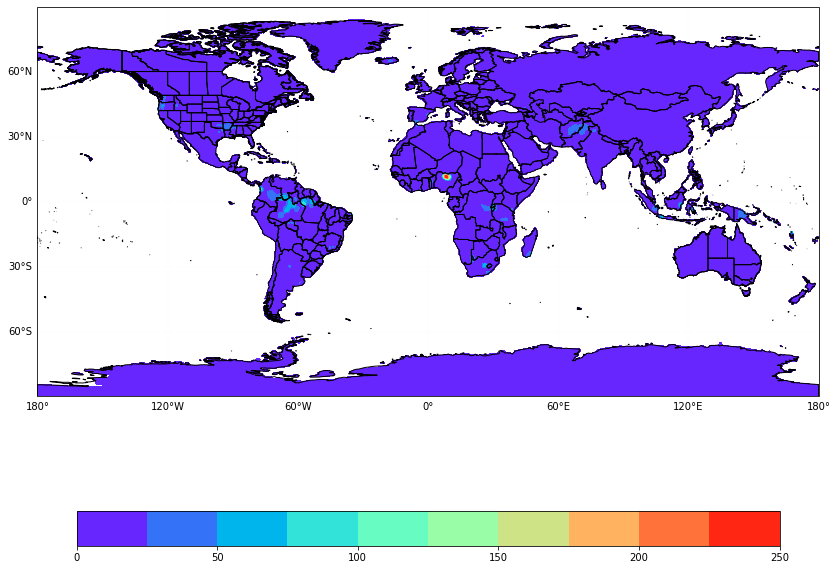

In [3]:
# plot 

fig = plt.figure(figsize=(14, 14))

ax = plt.axes(projection=cartopy.crs.PlateCarree())

plt.contourf(
    dset.lon,
    dset.lat,
    dset['precip'].sel(time=('2020-03-31')),
    10,
    transform=cartopy.crs.PlateCarree(),
    cmap=plt.cm.rainbow
)

gl = ax.gridlines(
    crs=cartopy.crs.PlateCarree(),
    draw_labels=True,
    linewidth=0.01
)

gl.top_labels = False
gl.right_labels = False

# contorno dos estados
states = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    scale='50m', facecolor='none',
    name='admin_1_states_provinces_shp'
)
ax.add_feature(states, edgecolor='k')

# contorno dos países
countries = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    scale='50m', facecolor='none',
    name='admin_0_countries'
)
ax.add_feature(countries, edgecolor='k')

plt.colorbar(shrink=0.9, orientation='horizontal')

plt.show()